### Importación de datos y librerías

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Agregar la carpeta 'src' al path de búsqueda de Python
sys.path.append(os.path.abspath('../src'))

# Importar funciones desde utils.py
from utils import (
    plot_categorical_grid,
    plot_categorical_target_grid,
    plot_numerical_grid,
    plot_numerical_target_grid,
    plot_boxplot,
    plot_corr_matrix
)

In [2]:
# Recargar módulos en Jupyter después de cambios en utils.py
%load_ext autoreload
%autoreload 2

In [3]:
# Cargar los datos
df = pd.read_csv("../data/heart-disease.csv")
df.head() # Primeras filas del dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Inspección inicial de dataset

In [4]:
nrow, ncol = df.shape # Tamaño del dataset
print(f'Hay {nrow} filas y {ncol} columnas')

Hay 303 filas y 14 columnas


In [5]:
df.info() # Información sobre tipos de datos y valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Característica** | **Descripción**
- **age**             | Edad en años                                                                
- **sex**             | Género (1 = hombre; 0 = mujer)                                              
- **cp**              | Tipo de dolor en el pecho:                                                  
    - `0`: Angina típica (dolor relacionado con problemas cardíacos).
    - `1`: Angina atípica (dolor no relacionado con el corazón).    
    - `2`: Dolor no anginal (espasmos esofágicos).                  
    - `3`: Asintomático.                                            
- **trestbps**        | Presión arterial en reposo (mm Hg). Valores > 130-140 son preocupantes.     
- **chol**            | Colesterol sérico (mg/dl). Valores > 200 indican posibles riesgos.          
- **fbs**             | Azúcar en sangre en ayunas > 120 mg/dl (1 = sí; 0 = no).                   
- **restecg**         | Resultados del electrocardiograma en reposo:                                
    - `0`: Sin anomalías.                                           
    - `1`: Anomalías en onda ST-T.                                  
    - `2`: Hipertrofia ventricular izquierda.                       
- **thalach**         | Frecuencia cardíaca máxima alcanzada.                                       
- **exang**           | Angina inducida por ejercicio (1 = sí; 0 = no).                            
- **oldpeak**         | Depresión del segmento ST durante el ejercicio. Indica estrés del corazón.  
- **slope**           | Pendiente del segmento ST durante el ejercicio máximo:                     
    - `0`: Ascendente (rara; buen estado).                          
    - `1`: Plana (saludable).                                       
    - `2`: Descendente (signos de enfermedad).                      
- **ca**              | Número de vasos coloreados (0-3) por fluoroscopia.                         
- **thal**            | Resultado del test de estrés con talio:                                    
    - `1`, `3`: Normal.                                             
    - `6`: Defecto fijo.                                            
    - `7`: Defecto reversible.                                      
- **target**          | Presencia de enfermedad (1 = sí; 0 = no).                                  

In [6]:
df.describe() # Estadísticas descripcivas

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# Distribución de la variable objetivo (target)
df.target.value_counts() # Recuento de clases

target
1    165
0    138
Name: count, dtype: int64

In [8]:
# Distribución de la variable objetivo en porcentajes
target_distribution = df.target.value_counts(normalize=True) * 100  # Convertir a porcentaje

# Formatear y mostrar los resultados
for clase, porcentaje in target_distribution.items():
    print(f'Clase {clase}: {porcentaje:.2f}%')

Clase 1: 54.46%
Clase 0: 45.54%


In [9]:
# Aplicar el theme por defecto
sns.set_theme()

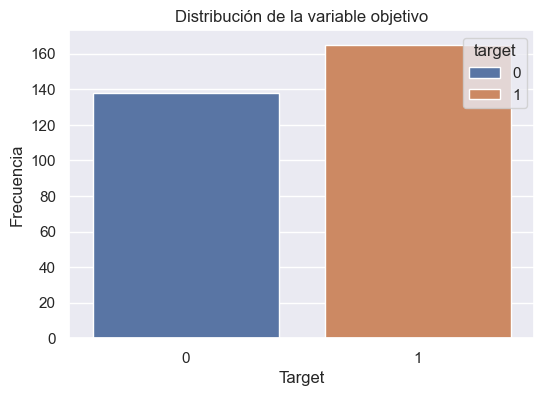

In [10]:
# Analizar el balance de clases gráficamente
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='target', hue='target')
plt.title('Distribución de la variable objetivo')
plt.xlabel('Target')
plt.ylabel('Frecuencia')
plt.show()

### Identificar valores nulos y duplicados

In [11]:
# Identificar valores nulos
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
# Comprobar si hay registros duplicados
print(f'Duplicados: {df.duplicated().sum()}')

Duplicados: 1


### Análisis univariado

Examina cada columna individualmente para entender su distribución.

#### 1. Variables categóricas

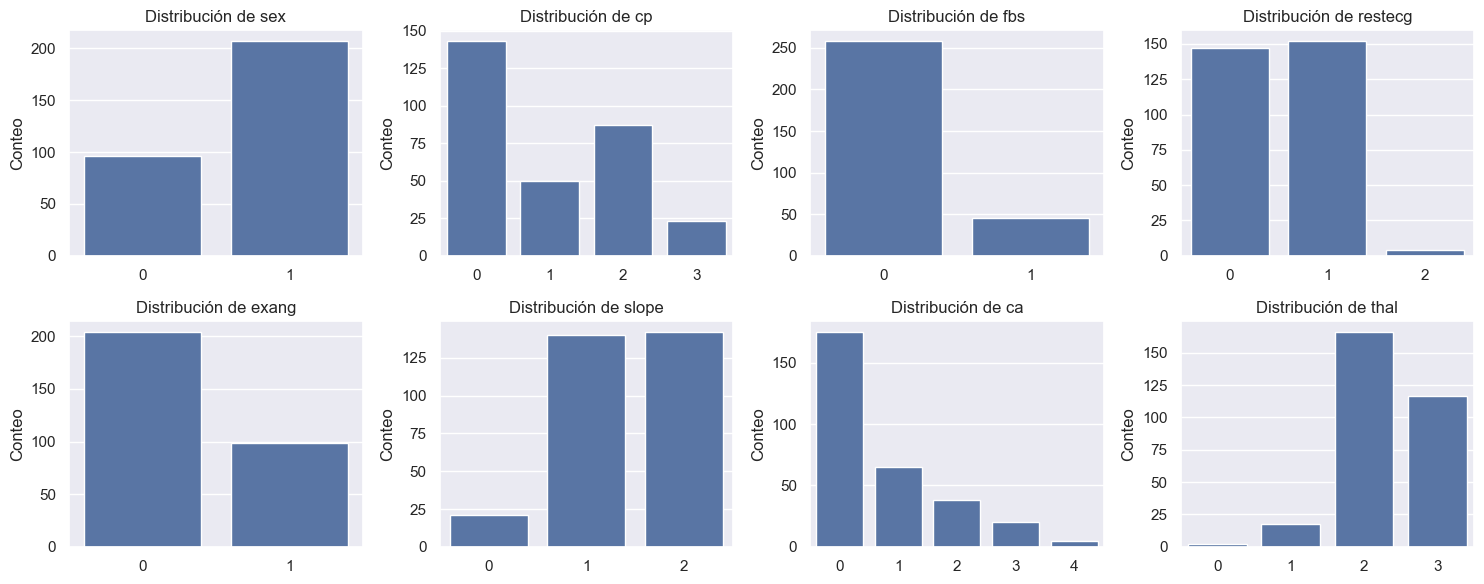

In [13]:
# Analizar variables categóricas
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
plot_categorical_grid(data=df, columns=cat_cols, n_cols=4, figsize=(15, 6))

In [14]:
# Frecuencia de enfermedad cardíaca según sexo
df.sex.value_counts() # 1 = hombre, 0 = mujer

sex
1    207
0     96
Name: count, dtype: int64

In [15]:
# Distribución de la variable 'sexo' en porcentajes
sex_distribution = df.sex.value_counts(normalize=True) * 100  # Convertir a porcentaje

# Formatear y mostrar los resultados
for clase, porcentaje in sex_distribution.items():
    print(f'Clase {clase}: {porcentaje:.2f}%')

Clase 1: 68.32%
Clase 0: 31.68%


#### 2. Variables numéricas

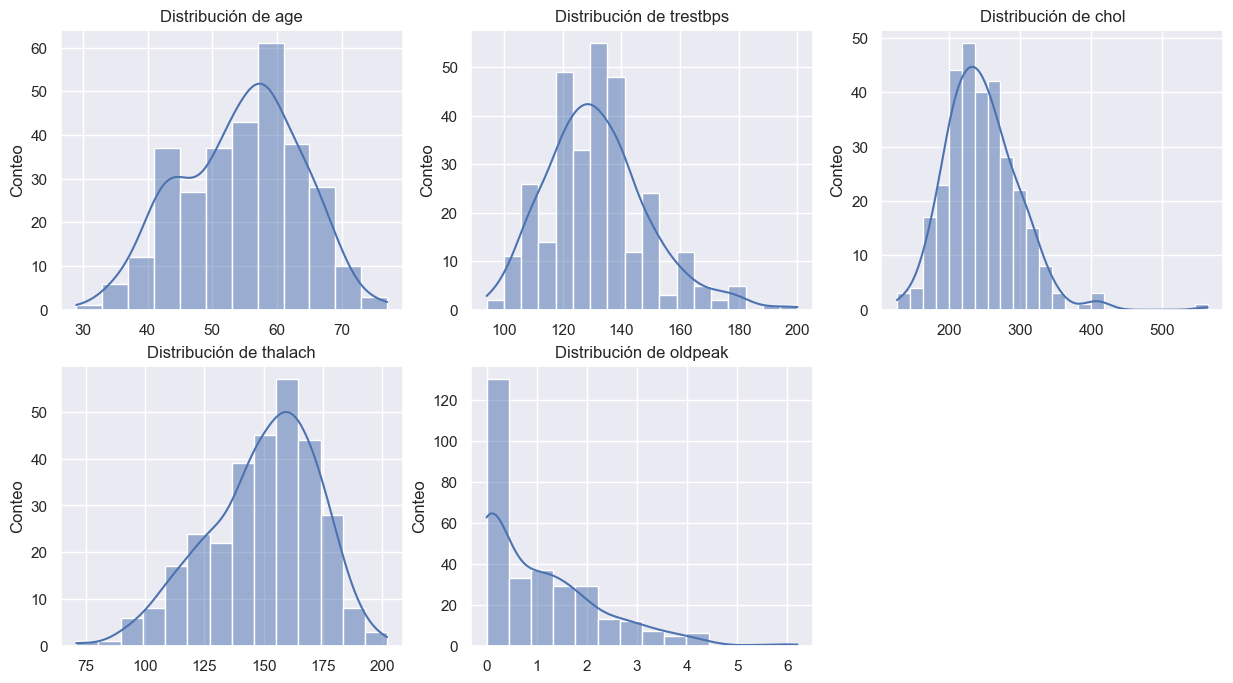

In [16]:
# Analizar variables numéricas
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plot_numerical_grid(data=df, columns=num_cols, n_cols=3, figsize=(15, 8))

### Análisis bivariado

Analiza cómo las variables independientes se relacionan con la variable objetivo (`target`).

#### 1. Variables categóricas

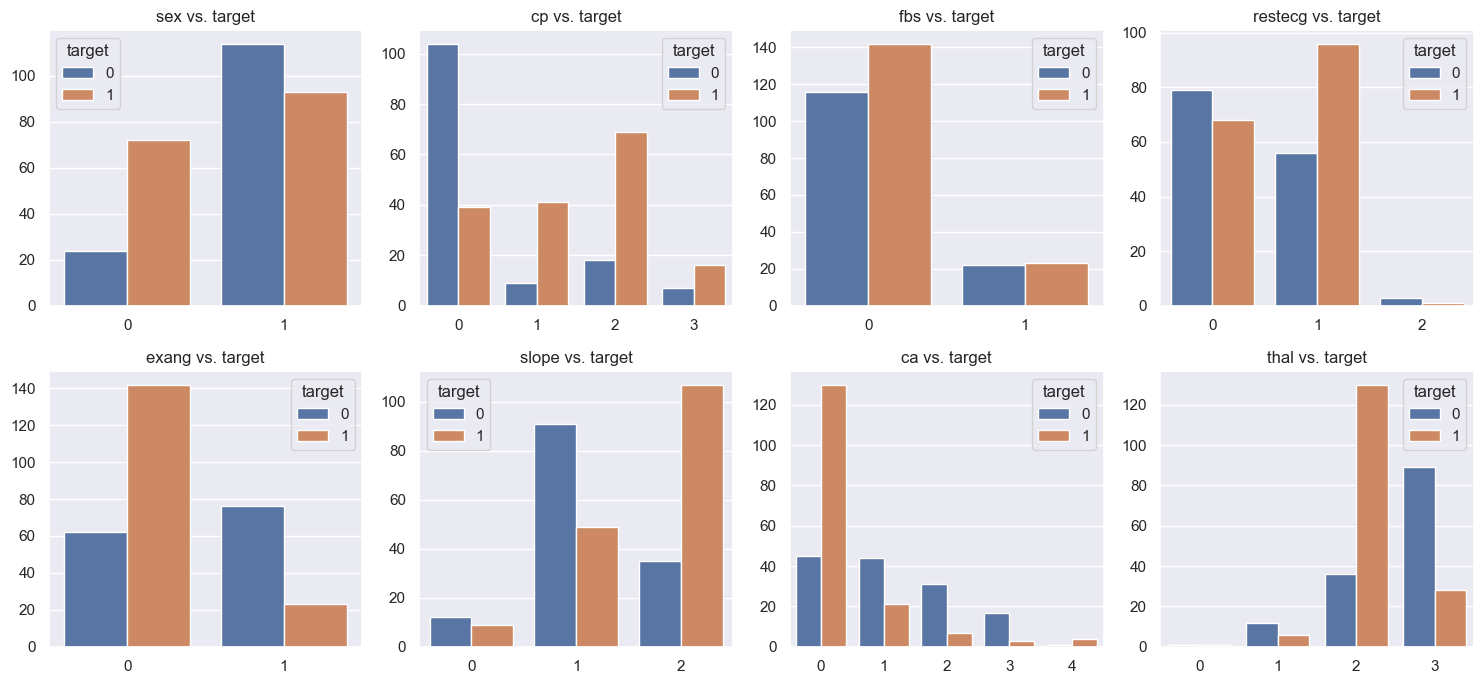

In [17]:
# Análisis bivariado - Analizar cómo se relacionan las variables categóricas con la variable objetivo
plot_categorical_target_grid(data=df, columns=cat_cols, n_cols=4, figsize=(15, 7))

In [18]:
# Comparar la columna target con la columna sexo en cifras
cross_tab = pd.crosstab(df.target, df.sex, margins=True)
cross_tab

sex,0,1,All
target,,,
0,24,114,138
1,72,93,165
All,96,207,303


In [19]:
# Calcular proporciones relativas dentro de cada género
proportions_by_sex = np.round(cross_tab.div(cross_tab.loc['All'], axis=1) * 100, 2)
proportions_by_sex # Qué proporción de hombres y mujeres tienen cada valor de target

sex,0,1,All
target,,,
0,25.0,55.07,45.54
1,75.0,44.93,54.46
All,100.0,100.00,100.00


In [20]:
# Calcular proporciones relativas dentro de cada categoría de target
proportions_by_target = np.round(cross_tab.div(cross_tab.loc[:, 'All'], axis=0) * 100, 2)
proportions_by_target # Cómo se distribuyen hombre y mujeres dentro de cada categoría de target

sex,0,1,All
target,,,
0,17.39,82.61,100.0
1,43.64,56.36,100.0
All,31.68,68.32,100.0


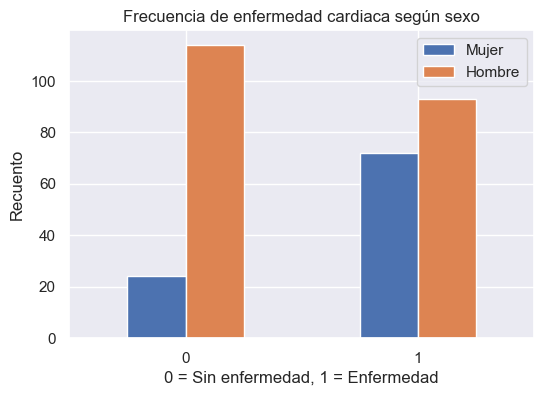

In [21]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(6,4))
plt.title("Frecuencia de enfermedad cardiaca según sexo")
plt.xlabel("0 = Sin enfermedad, 1 = Enfermedad")
plt.ylabel("Recuento")
plt.legend(["Mujer", "Hombre"])
plt.xticks(rotation=0);

In [22]:
# Comparar la columna target con la columna cp (chest pain type - tipo de dolor en el pecho) en cifras
cross_tab = pd.crosstab(df.target, df.cp, margins=True)
cross_tab

cp,0,1,2,3,All
target,,,,,
0,104,9,18,7,138
1,39,41,69,16,165
All,143,50,87,23,303


- `0`: Angina típica (dolor relacionado con problemas cardíacos).
- `1`: Angina atípica (dolor no relacionado con el corazón).
- `2`: Dolor no anginal (espasmos esofágicos).
- `3`: Asintomático.

In [23]:
# Calcular proporciones relativas dentro de cada categoría de target
proportions_by_target = np.round(cross_tab.div(cross_tab.loc[:, 'All'], axis=0) * 100, 2)
proportions_by_target # Cómo se distribuyen hombre y mujeres dentro de cada categoría de target

cp,0,1,2,3,All
target,,,,,
0,75.36,6.52,13.04,5.07,100.0
1,23.64,24.85,41.82,9.70,100.0
All,47.19,16.50,28.71,7.59,100.0


#### 2. Variables numéricas

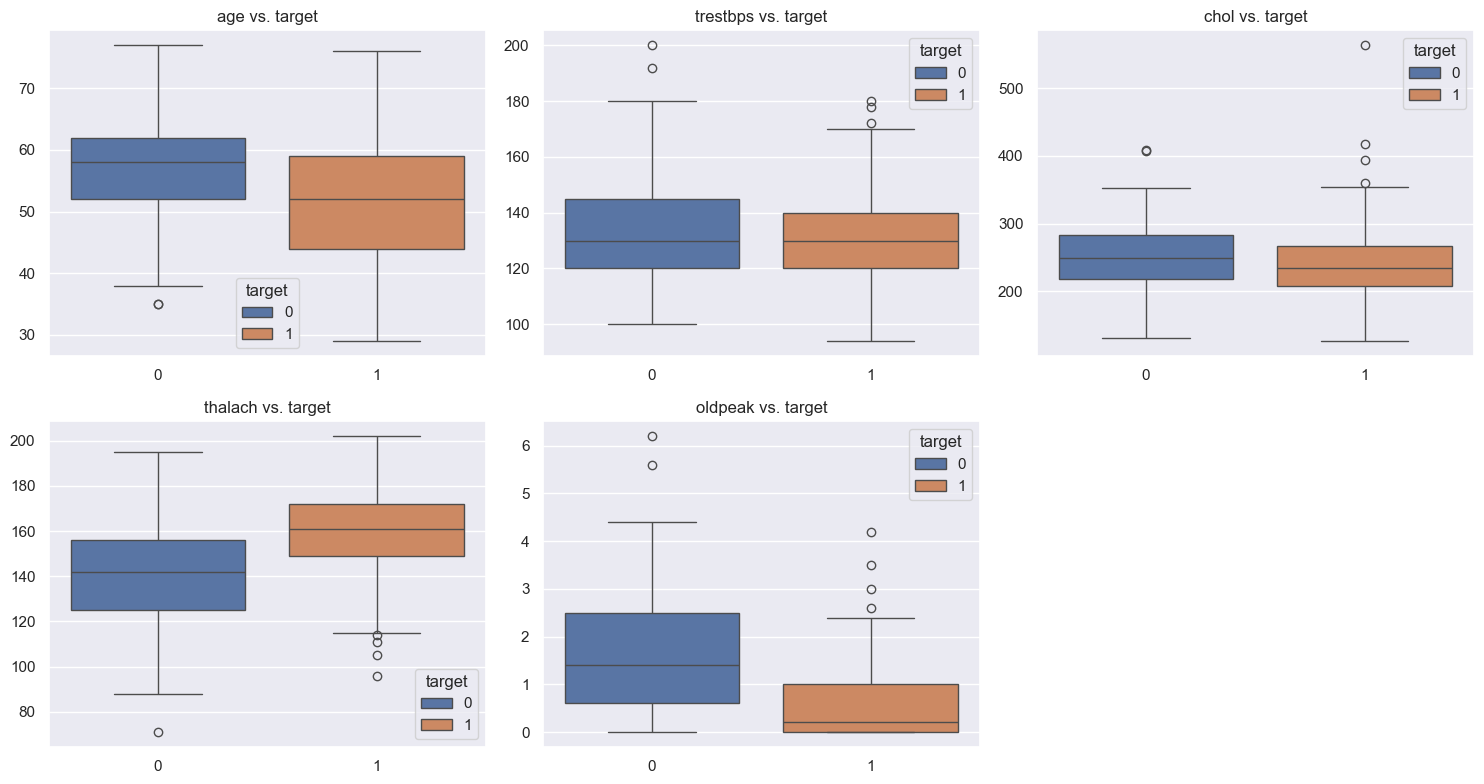

In [24]:
# Análisis bivariado - Analizar cómo se relacionan las variables numéricas con la variable objetivo
plot_numerical_target_grid(data=df, columns=num_cols, n_cols=3, figsize=(15, 8))

### Análisis de correlaciones

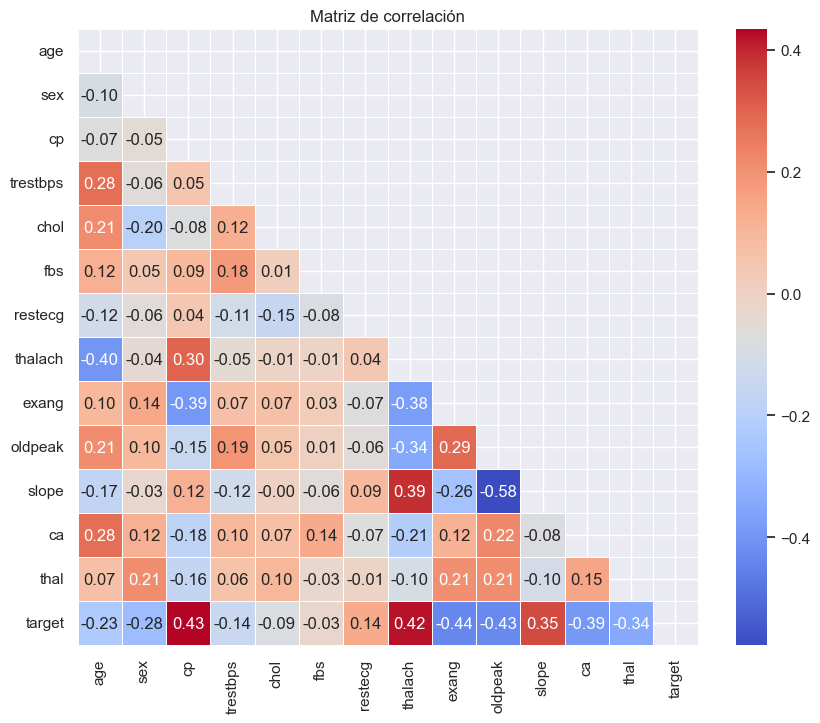

In [25]:
plot_corr_matrix(df)

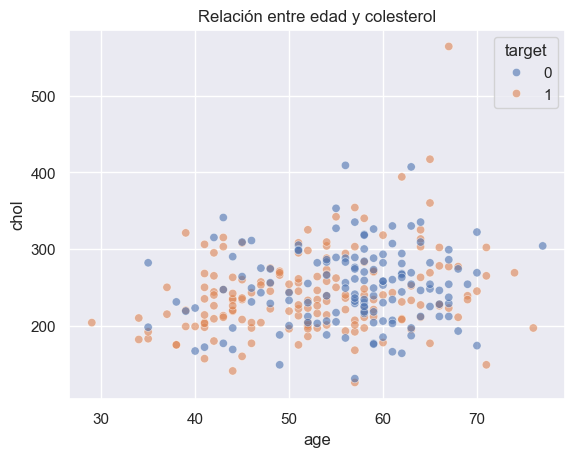

In [26]:
# Relaciones específicas
sns.scatterplot(data=df, x='age', y='chol', hue='target', alpha=0.6)
plt.title('Relación entre edad y colesterol')

# Guardar y mostrar el gráfico
plt.savefig('../assets/eda/age_vs_chol_target.png')
plt.show()
plt.close()

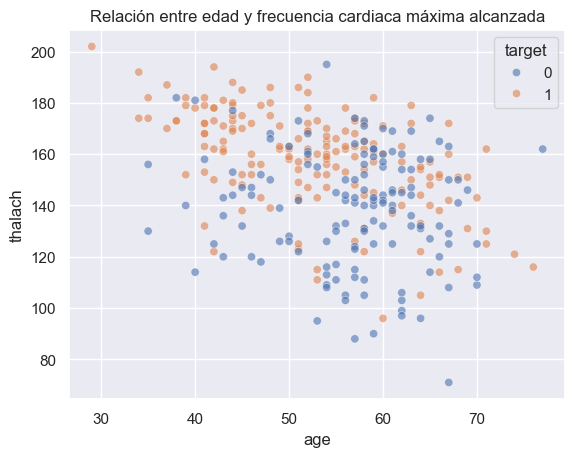

In [27]:
# Relaciones específicas (entre pares de variables que tienen alta correlación)
sns.scatterplot(data=df, x='age', y='thalach', hue='target', alpha=0.6)
plt.title('Relación entre edad y frecuencia cardiaca máxima alcanzada')

# Guardar y mostrar el gráfico
plt.savefig('../assets/eda/age_vs_thalach_target.png')
plt.show()
plt.close()

### Detección de valores atípicos

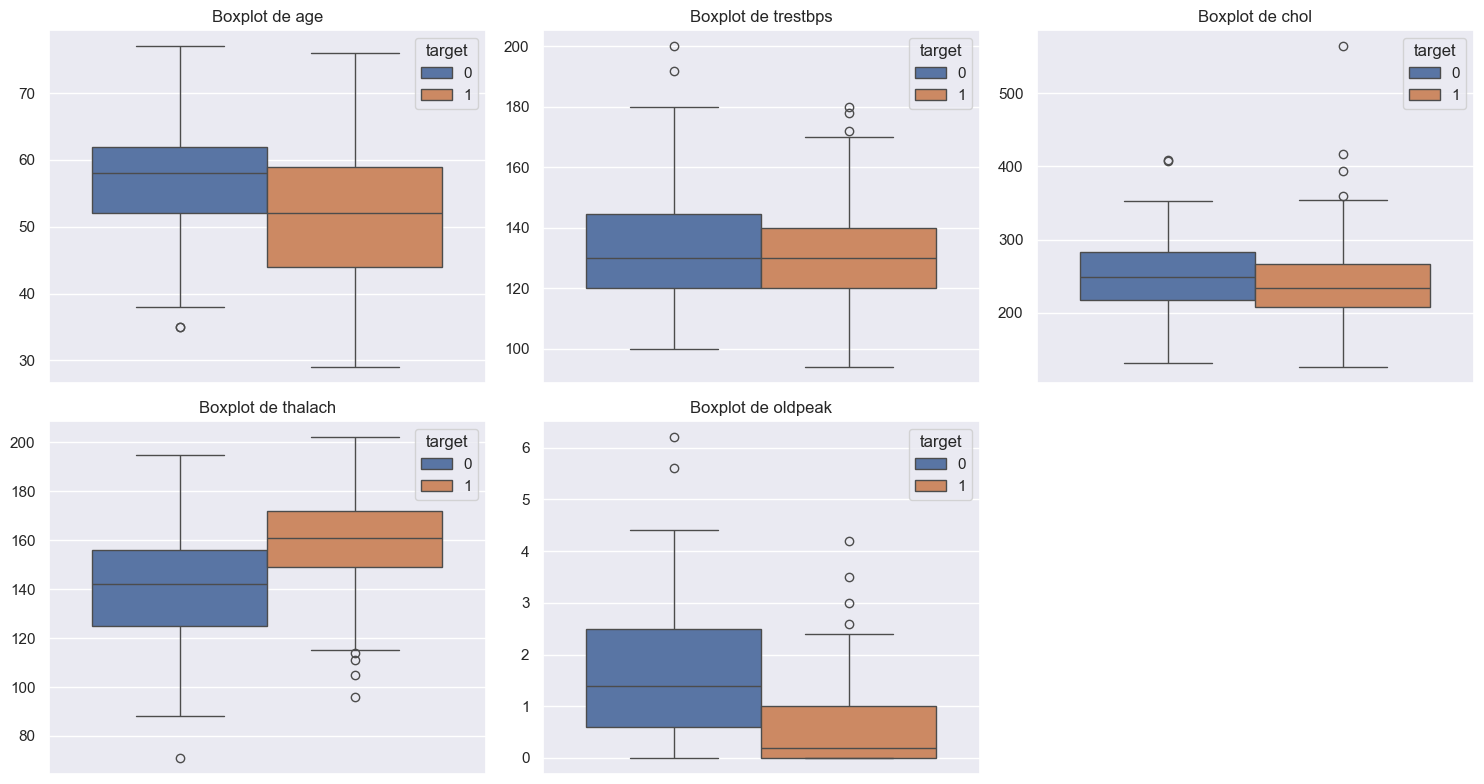

In [28]:
# Boxplots para identificar outliers
plot_boxplot(data=df, columns=num_cols, n_cols=3, figsize=(15, 8))

In [29]:
# Uso del rango intercuartílico (IQR)
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
IQR

age         13.5
trestbps    20.0
chol        63.5
thalach     32.5
oldpeak      1.6
dtype: float64

In [30]:
# Eliminar valores atípicos si es necesario
# df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]